In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv("../data/diabetes_prediction_dataset.csv")

In [45]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [46]:
print(df["age"].min())
print(df["age"].max())
print(df["bmi"].min())
print(df["bmi"].max())
print(df["HbA1c_level"].min())
print(df["HbA1c_level"].max())
print(df["blood_glucose_level"].min())
print(df["blood_glucose_level"].max())

0.08
80.0
10.01
95.69
3.5
9.0
80
300


#### x가 a값을 나타낸다면 이것은 a <= x < a+step 을 의미

In [47]:
x_age = np.arange(0.0, 85.0, 5.0)
x_bmi = np.arange(10.0, 100.0, 5.0)
x_HbA1c_level = np.arange(3.0, 10.0, 1.0)
x_blood_glucose_level = np.arange(80.0, 310.0, 10.0)

## 각 feature별 분포를 확인하기 위해 feature의 frequency를 시각화

### 연속적 성질을 가진 feature들을 step에 맞게 범주화

In [48]:
s_age = df["age"].copy()
s_bmi = df["bmi"].copy()
s_HbA1c_level = df["HbA1c_level"].copy()
s_blood_glucose_level = df["blood_glucose_level"].copy()

In [49]:
s_age.sort_values(inplace=True, ascending=True)
s_bmi.sort_values(inplace=True, ascending=True)
s_HbA1c_level.sort_values(inplace=True, ascending=True)
s_blood_glucose_level.sort_values(inplace=True, ascending=True)

In [50]:
s_age

67326     0.08
34663     0.08
9683      0.08
53735     0.08
98965     0.08
         ...  
63255    80.00
63308    80.00
63342    80.00
63371    80.00
49999    80.00
Name: age, Length: 100000, dtype: float64

In [51]:
y_age = np.zeros_like(x_age)
y_bmi = np.zeros_like(x_bmi)
y_HbA1c_level = np.zeros_like(x_HbA1c_level)
y_blood_glucose_level = np.zeros_like(x_blood_glucose_level)

yidx = 0
for age in s_age.to_numpy():
    if x_age[yidx] <= age < x_age[yidx] + 5.0:
        y_age[yidx] += 1
    else:
        yidx += 1
        y_age[yidx] += 1
print(y_age.sum())

yidx = 0
for bmi in s_bmi.to_numpy():
    if x_bmi[yidx] <= bmi < x_bmi[yidx] + 5.0:
        y_bmi[yidx] += 1
    else:
        yidx += 1
        y_bmi[yidx] += 1
print(y_bmi.sum())

yidx = 0
for HbA1c_level in s_HbA1c_level.to_numpy():
    if x_HbA1c_level[yidx] <= HbA1c_level < x_HbA1c_level[yidx] + 1.0:
        y_HbA1c_level[yidx] += 1
    else:
        yidx += 1
        y_HbA1c_level[yidx] += 1
print(y_HbA1c_level.sum())

yidx = 0
for blood_glucose_level in s_blood_glucose_level.to_numpy():
    if x_blood_glucose_level[yidx] <= blood_glucose_level < x_blood_glucose_level[yidx] + 10.0:
        y_blood_glucose_level[yidx] += 1
    else:
        yidx += 1
        y_blood_glucose_level[yidx] += 1
print(y_blood_glucose_level.sum())

100000.0
100000.0
100000.0
100000.0


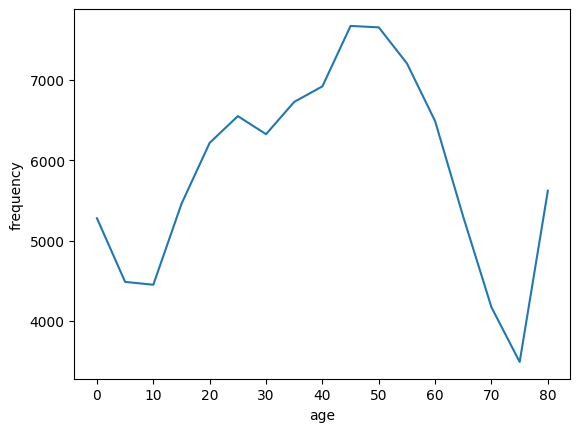

In [52]:
plt.plot(x_age, y_age)
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

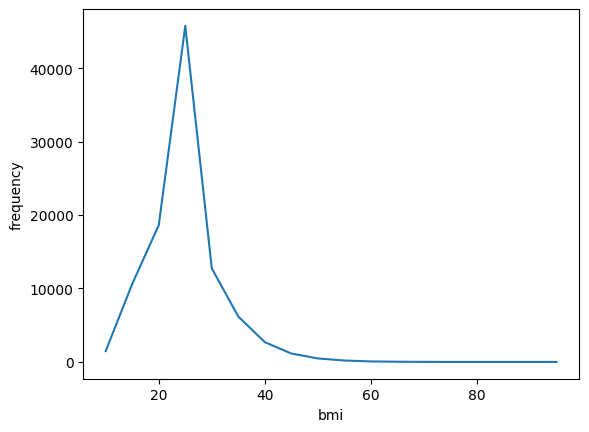

In [53]:
plt.plot(x_bmi, y_bmi)
plt.xlabel("bmi")
plt.ylabel("frequency")
plt.show()

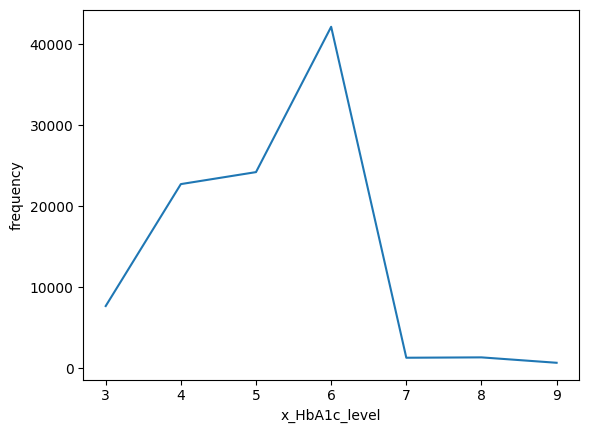

In [54]:
plt.plot(x_HbA1c_level, y_HbA1c_level)
plt.xlabel("x_HbA1c_level")
plt.ylabel("frequency")
plt.show()

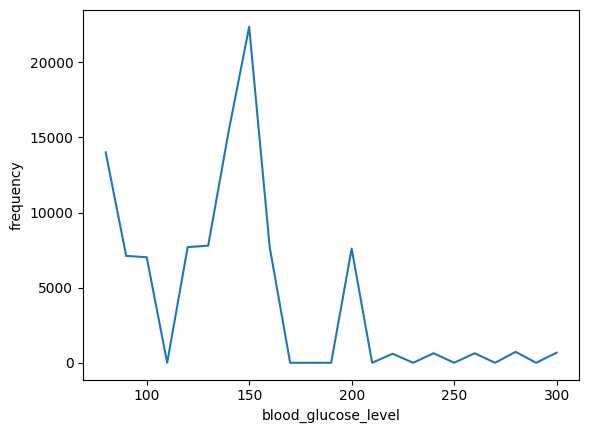

In [55]:
plt.plot(x_blood_glucose_level, y_blood_glucose_level)
plt.xlabel("blood_glucose_level")
plt.ylabel("frequency")
plt.show()

------------------------------------------

# 데이터를 분석하여 인사이트를 획득하자!
#### 결국엔 feature를 target과 연관시켜 분석해야 인사이트를 획득할 수 있을 것이다.

### 이산적인 feature라면 표로 비율을 계산하려고 한다
### 연속적인 feature라면 산점도를 이용해 2개의 연속적 feature에서 diabetes의 분포도를 파악하려고 한다

In [56]:
print(df["gender"].unique())
print(df["hypertension"].unique())

['Female' 'Male' 'Other']
[0 1]


In [57]:
df_gender_hypertension = df[["gender", "hypertension", "diabetes"]]
df_gender_hypertension.head()

,gender,hypertension,diabetes
0,Female,0,0
1,Female,0,0
2,Male,0,0
3,Female,0,0
4,Male,1,0


In [58]:
female_yeshyper = 0
female_nohyper = 0
male_yeshyper = 0
male_nohyper = 0
table_total = [[0,0], [0,0]]
table_diabetes = [[0,0], [0,0]]
# row는 gender, column은 hyper인 diabetes비율 행렬을 만들 것이다.
# 0행은 Female, 1행은 Male, 0열은 nohyper, 1열은 yeshyper
for data in df_gender_hypertension.to_numpy():
    if data[0] == "Female" and data[1] == 0:
        table_total[0][0] += 1
        if data[2] == 1:
            table_diabetes[0][0] += 1
    elif data[0] == "Female" and data[1] == 1:
        table_total[0][1] += 1
        if data[2] == 1:
            table_diabetes[0][1] += 1
    elif data[0] == "Male" and data[1] == 0:
        table_total[1][0] += 1
        if data[2] == 1:
            table_diabetes[1][0] += 1
    elif data[0] == "Male" and data[1] == 1:
        table_total[1][1] += 1
        if data[2] == 1:
            table_diabetes[1][1] += 1

table_diabetes = np.array(table_diabetes)
table_total = np.array(table_total)

df_gender_hyper = pd.DataFrame(data=table_diabetes/table_total, index=["Female", "Male"], columns=['NOhyper', "YEShyper"])
df_gender_hyper

,NOhyper,YEShyper
Female,0.061503,0.266381
Male,0.080462,0.295012


## diabetes는 여자보다는 남자가 조금 더 높으며, 고혈압이 있으면 확연히 높은 걸 확인할 수 있다.

In [59]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [60]:
df_disease_smoking = df[["heart_disease", "smoking_history", "diabetes"]]
df_disease_smoking.head()

,heart_disease,smoking_history,diabetes
0,1,never,0
1,0,No Info,0
2,0,never,0
3,0,current,0
4,1,current,0


In [61]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [62]:
total = [[0,0,0,0,0], [0,0,0,0,0]]
diabetes = [[0,0,0,0,0], [0,0,0,0,0]]
# row는 heart_disease, column은 smoking_history인 diabetes비율 행렬을 만들 것이다.
# 0행은 NOdisease, 1행은 YESdisease, 0~4열 순서대로 never, current, former, ever, not current

smoking_dict = {"never":0, "current":1, "former":2, "ever":3, "not current":4}

for data in df_disease_smoking.to_numpy():
    if data[1] == "No Info":
        continue
    if data[0] == 0:
        total[0][smoking_dict[data[1]]] += 1
        if data[2] == 1:
            diabetes[0][smoking_dict[data[1]]] += 1
    elif data[0] == 1:
        total[1][smoking_dict[data[1]]] += 1
        if data[2] == 1:
            diabetes[1][smoking_dict[data[1]]] += 1

table_diabetes = np.array(diabetes)
table_total = np.array(total)

df_gender_hyper = pd.DataFrame(data=table_diabetes/table_total, index=["NOdisease", "YESdisease"], columns=["never", "current",\
    "former", "ever", "not current"])
df_gender_hyper

,never,current,former,ever,not current
NOdisease,0.086711,0.092036,0.149692,0.099160,0.097319
YESdisease,0.362808,0.320293,0.359031,0.338658,0.311644


## 심장병이 있으면 흡연 여부와는 상관없이 당뇨가 높다.
## 심장병이 없다면 과거에 흡연했던 사람이 확연히 높다.

## 이제 연속적인 데이터의 분포를 알아보자

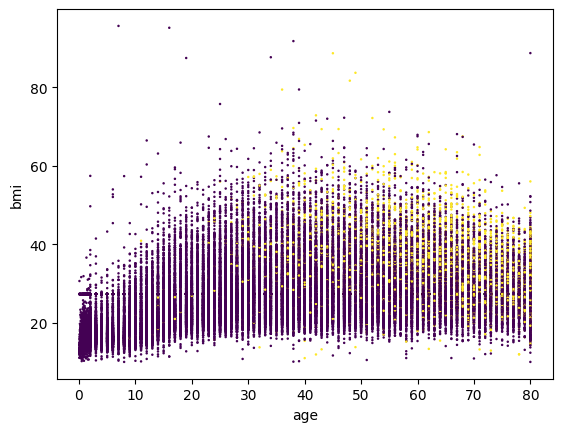

In [63]:
np_age = df["age"].to_numpy()
np_bmi = df["bmi"].to_numpy()

plt.scatter(np_age, np_bmi, s=0.6, c=df["diabetes"].to_numpy())
plt.xlabel("age")
plt.ylabel("bmi")
plt.show()

## age가 높을수록, bmi가 높을수록 당뇨 확률이 커진다

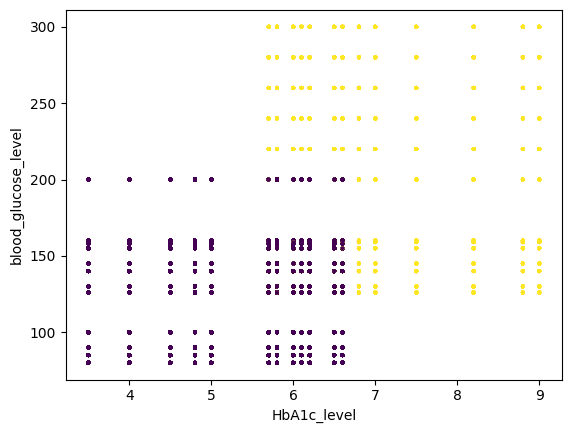

In [64]:
np_HbA1c_level = df["HbA1c_level"].to_numpy()
np_blood_glucose_level = df["blood_glucose_level"].to_numpy()

plt.scatter(np_HbA1c_level, np_blood_glucose_level, s=3, c=df["diabetes"].to_numpy())
plt.xlabel("HbA1c_level")
plt.ylabel("blood_glucose_level")
plt.show()

## 산점도로 분석하기엔 값이 연속적이지 않다. 다른 방법이 필요하다

In [65]:
df_HbA1c_level_isdiabetes = df[["HbA1c_level", "diabetes"]]
df_blood_glucose_level_isdiabetes = df[["blood_glucose_level", "diabetes"]]

df_HbA1c_level_isdiabetes.sort_values(by=["HbA1c_level"], ascending=True, inplace=True)
df_blood_glucose_level_isdiabetes.sort_values(by=["blood_glucose_level"], ascending=True, inplace=True)

print(df_HbA1c_level_isdiabetes)
print(df_blood_glucose_level_isdiabetes)

       HbA1c_level  diabetes
49999          3.5         0
54486          3.5         0
54476          3.5         0
98647          3.5         0
54472          3.5         0
...            ...       ...
33119          9.0         1
17403          9.0         1
66495          9.0         1
66472          9.0         1
37402          9.0         1

[100000 rows x 2 columns]
       blood_glucose_level  diabetes
59628                   80         0
66099                   80         0
66080                   80         0
29542                   80         0
29545                   80         0
...                    ...       ...
6319                   300         1
2360                   300         1
62774                  300         1
47060                  300         1
98360                  300         1

[100000 rows x 2 columns]


C:\Users\embed\AppData\Local\Temp\ipykernel_6704\3486169311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HbA1c_level_isdiabetes.sort_values(by=["HbA1c_level"], ascending=True, inplace=True)
C:\Users\embed\AppData\Local\Temp\ipykernel_6704\3486169311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blood_glucose_level_isdiabetes.sort_values(by=["blood_glucose_level"], ascending=True, inplace=True)


In [66]:
y_HbA1c_level_diabetes = np.zeros_like(y_HbA1c_level)
y_blood_glucose_level_diabetes = np.zeros_like(y_blood_glucose_level)


yidx = 0
for HbA1c_level in df_HbA1c_level_isdiabetes.to_numpy():
    if x_HbA1c_level[yidx] <= HbA1c_level[0] < x_HbA1c_level[yidx] + 1.0:
        if HbA1c_level[1] == 1:
            y_HbA1c_level_diabetes[yidx] += 1
    else:
        yidx += 1
        if HbA1c_level[1] == 1:
            y_HbA1c_level_diabetes[yidx] += 1

yidx = 0
for blood_glucose_level in df_blood_glucose_level_isdiabetes.to_numpy():
    if x_blood_glucose_level[yidx] <= blood_glucose_level[0] < x_blood_glucose_level[yidx] + 10.0:
        if blood_glucose_level[1] == 1:
            y_blood_glucose_level_diabetes[yidx] += 1
    else:
        yidx += 1
        if blood_glucose_level[1] == 1:
            y_blood_glucose_level_diabetes[yidx] += 1       

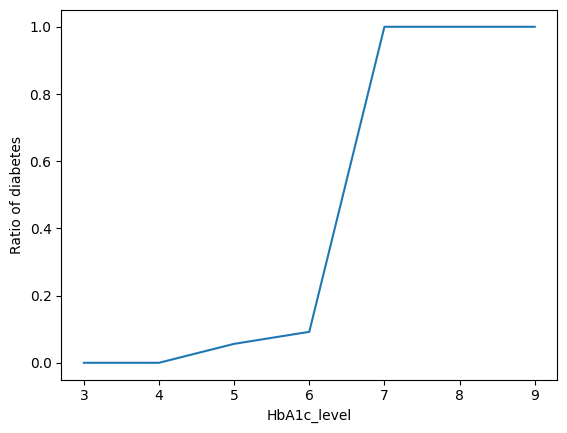

[3. 4. 5. 6. 7. 8. 9.]
[0.         0.         0.05631068 0.09213398 1.         1.
 1.        ]


In [67]:
plt.plot(x_HbA1c_level, y_HbA1c_level_diabetes/y_HbA1c_level)
plt.xlabel("HbA1c_level")
plt.ylabel("Ratio of diabetes")
plt.show()
print(x_HbA1c_level)
print(y_HbA1c_level_diabetes/y_HbA1c_level)

## HbA1c레벨이 7부터는 반드시 1이다.
## 나머지는 증가 추세를 보인다.

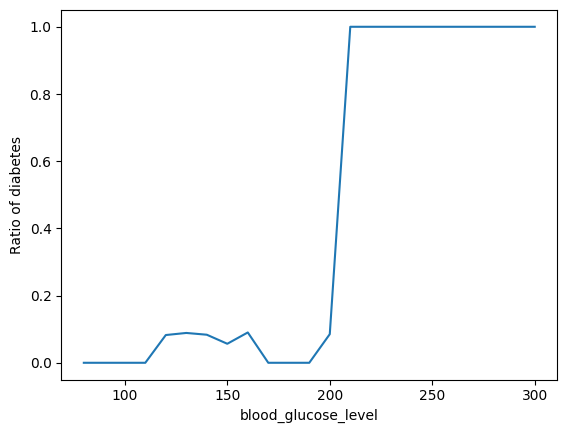

[ 80.  90. 100. 110. 120. 130. 140. 150. 160. 170. 180. 190. 200. 210.
 220. 230. 240. 250. 260. 270. 280. 290. 300.]
[0.         0.         0.         0.         0.08258668 0.08878625
 0.08351178 0.05657424 0.09024896 0.         0.         0.
 0.0851652  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


In [68]:
plt.plot(x_blood_glucose_level, y_blood_glucose_level_diabetes/y_blood_glucose_level)
plt.xlabel("blood_glucose_level")
plt.ylabel("Ratio of diabetes")
plt.show()
print(x_blood_glucose_level)
print(y_blood_glucose_level_diabetes/y_blood_glucose_level)

## glucose레벨이 210부터는 반드시 당뇨병이다.
## 나머지는 종 모양의 추세를 보인다

## 이산적인 데이터에 대하여, diabetes라고 할 때 각 비율이 어떻게 되는지 살펴보자

In [69]:
df_gender = df[["gender", "diabetes"]]
df_gender_diabetes = df_gender[df_gender["diabetes"] == 1]

print(df_gender_diabetes["gender"].value_counts())

gender
Female    4461
Male      4039
Name: count, dtype: int64


### 성별에 other라고 답한 사람은 전부 diabetes가 0임을 알 수 있다.
### 남자가 diabetes 비율이 더 높으나 사람 수는 더 적은 것은 여자가 데이터가 더  많다는 뜻이다.

----------

# 당뇨병 비율을 NORMALIZE한 값을 신경망의 입력으로 써 보자!

In [70]:
# 0인덱스는 female, 1인덱스는 male
gender_total = [df["gender"].value_counts().loc["Female"], df["gender"].value_counts().loc["Male"]]
gender_diabetes = [df_gender_diabetes["gender"].value_counts().loc["Female"], df_gender_diabetes["gender"].value_counts().loc["Male"]]
gender_isdiabetes = pd.DataFrame(data=[gender_total, gender_diabetes], index=["total", "diabetes"], columns=["Female", "Male"])
gender_isdiabetes

,Female,Male
total,58552,41430
diabetes,4461,4039


In [71]:
gender_isdiabetes_np = gender_isdiabetes.to_numpy()
gender_diabetes_ratio = gender_isdiabetes_np[1]/gender_isdiabetes_np[0]

print(gender_diabetes_ratio)

list1 = [gender_diabetes_ratio[0]/gender_diabetes_ratio.sum(), gender_diabetes_ratio[1]/gender_diabetes_ratio.sum()]
gender_diabetes_ratio_normalized = np.array(list1)
gender_diabetes_ratio_normalized

[0.07618869 0.09748974]


array([0.43867674, 0.56132326])

## ↑ 이 Normalized된 비율을 DNN의 입력 값으로 넣어볼 것이다.
## Normalize하는 이유는 나중에 MinMaxScaler를 사용하기 위함이다.

## 다른 이산적인 데이터(hypertension, heart_disease, smoking_history)에 대해서도 동일하게 적용한다

In [72]:
df_hyper_diabetes = df[["hypertension", "diabetes"]]
df_hyper_diabetes = df_hyper_diabetes[df_hyper_diabetes["diabetes"] == 1]

hyper_total = [df["hypertension"].value_counts().loc[0], df["hypertension"].value_counts().loc[1]]
hyper_diabetes = [df_hyper_diabetes["hypertension"].value_counts().loc[0], df_hyper_diabetes["hypertension"].value_counts().loc[1]]
hyper_isdiabetes = pd.DataFrame(data=[hyper_total, hyper_diabetes], index=["total", "diabetes"], columns=["NOhyper", "Yeshyper"])
hyper_isdiabetes

,NOhyper,Yeshyper
total,92515,7485
diabetes,6412,2088


In [73]:
hyper_isdiabetes_np = hyper_isdiabetes.to_numpy()
hyper_diabetes_ratio = hyper_isdiabetes_np[1]/hyper_isdiabetes_np[0]

print(hyper_diabetes_ratio)

list1 = [hyper_diabetes_ratio[0]/hyper_diabetes_ratio.sum(), hyper_diabetes_ratio[1]/hyper_diabetes_ratio.sum()]
hyper_diabetes_ratio_normalized = np.array(list1)
hyper_diabetes_ratio_normalized

[0.06930768 0.27895792]


array([0.19900812, 0.80099188])

## ↑ hypertension에 대한 normalization 값

In [74]:
df_disease_diabetes = df[["heart_disease", "diabetes"]]
df_disease_diabetes = df_disease_diabetes[df_disease_diabetes["diabetes"] == 1]

disease_total = [df["heart_disease"].value_counts().loc[0], df["heart_disease"].value_counts().loc[1]]
disease_diabetes = [df_disease_diabetes["heart_disease"].value_counts().loc[0], df_disease_diabetes["heart_disease"].value_counts().loc[1]]
disease_isdiabetes = pd.DataFrame(data=[disease_total, disease_diabetes], index=["total", "diabetes"], columns=["NOdisease", "Yesdisease"])
disease_isdiabetes

,NOdisease,Yesdisease
total,96058,3942
diabetes,7233,1267


In [75]:
disease_isdiabetes_np = disease_isdiabetes.to_numpy()
disease_diabetes_ratio = disease_isdiabetes_np[1]/disease_isdiabetes_np[0]

print(disease_diabetes_ratio)

list1 = [disease_diabetes_ratio[0]/disease_diabetes_ratio.sum(), disease_diabetes_ratio[1]/disease_diabetes_ratio.sum()]
disease_diabetes_ratio_normalized = np.array(list1)
disease_diabetes_ratio_normalized

[0.07529826 0.32141045]


array([0.18980742, 0.81019258])

## ↑ heart_disease에 대한 normalization 값

In [76]:
df_smoking_diabetes = df[["smoking_history", "diabetes"]]
df_smoking_diabetes = df_smoking_diabetes[df_smoking_diabetes["diabetes"] == 1]
smoking_total = [
    df["smoking_history"].value_counts().loc["never"],
    df["smoking_history"].value_counts().loc["current"],
    df["smoking_history"].value_counts().loc["former"],
    df["smoking_history"].value_counts().loc["ever"],
    df["smoking_history"].value_counts().loc["not current"]
]
smoking_diabetes = [
    df_smoking_diabetes["smoking_history"].value_counts().loc["never"],
    df_smoking_diabetes["smoking_history"].value_counts().loc["current"],
    df_smoking_diabetes["smoking_history"].value_counts().loc["former"],
    df_smoking_diabetes["smoking_history"].value_counts().loc["ever"],
    df_smoking_diabetes["smoking_history"].value_counts().loc["not current"]
]
smoking_isdiabetes = pd.DataFrame(data=[smoking_total, smoking_diabetes], index=["total", "diabetes"], \
                                  columns=["never", "current", "former", "ever", "not current"])
smoking_isdiabetes

,never,current,former,ever,not current
total,35095,9286,9352,4004,6447
diabetes,3346,948,1590,472,690


In [77]:
smoking_isdiabetes_np = smoking_isdiabetes.to_numpy()
smoking_diabetes_ratio = smoking_isdiabetes_np[1]/smoking_isdiabetes_np[0]

print(smoking_diabetes_ratio)

list1 = [smoking_diabetes_ratio[0]/smoking_diabetes_ratio.sum(),
         smoking_diabetes_ratio[1]/smoking_diabetes_ratio.sum(),
         smoking_diabetes_ratio[2]/smoking_diabetes_ratio.sum(),
         smoking_diabetes_ratio[3]/smoking_diabetes_ratio.sum(),
         smoking_diabetes_ratio[4]/smoking_diabetes_ratio.sum()
        ]
smoking_diabetes_ratio_normalized = np.array(list1)
smoking_diabetes_ratio_normalized

[0.09534122 0.10208917 0.17001711 0.11788212 0.10702652]


array([0.16095253, 0.17234424, 0.2870184 , 0.19900548, 0.18067935])

## ↑ smoking_history 대한 normalization 값